# Task 1

2. Classify variables SalePrice, LotArea, HouseStyle, OverallQual, MSSubClass, YearBuilt by scales of measure-
ment; as qualitative or quantitative.

- SalePrice - quantitative, ratio. 
    - Has true zero
    - 300k house is twice as expensive as 150k house
- LotArea - quantitative, ratio.
    - Has true zero
    - 2000 sqft lot is twice as large as 1000 sqft lot
- HouseStyle - qualitative, somewhat nominal.
    - No natural ordering
    - We can consider 2 story house as "larger" than 1 story house, but this is not a strict ordering
- OverallQual - qualitative, ordinal.
    - Has natural ordering (1 to 10)
    - 8 quality is better than 6 quality, but we cannot say that 8 is twice as good as 4
- MSSubClass - qualitative, nominal.
    - No natural ordering
    - Just a code for different types of dwelling
- YearBuilt - quantitative, interval.
    - No true zero (year 0 does not mean absence of time)
    - 2000 is twice as new as 1000 is not meaningful

### 2. Plot SalesPrice histogram 

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Exploratory
df = pd.read_csv('data/AmesHousing.csv')

<Axes: xlabel='SalePrice', ylabel='Count'>

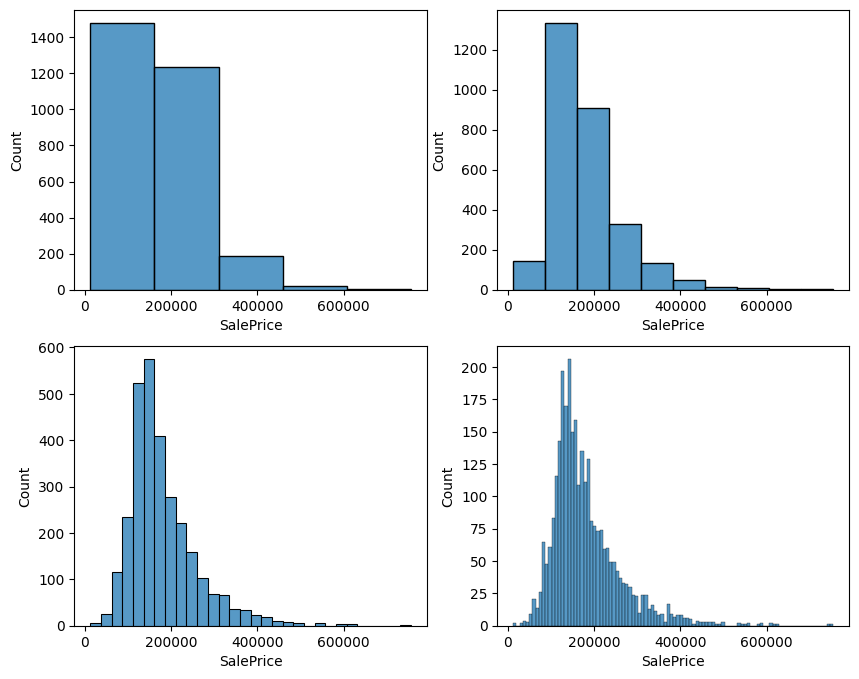

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df['SalePrice'], ax=axes[0,0], bins=5)
sns.histplot(data=df['SalePrice'], ax=axes[0,1], bins=10)
sns.histplot(data=df['SalePrice'], ax=axes[1,0], bins=30)
sns.histplot(data=df['SalePrice'], ax=axes[1,1], bins=100)

### Compute quantiles of levels 0.1,0.2,..., 0.9 for SalePrice.

In [5]:
for i in range(1, 10):
    print(f"Quantile {i/10}", "=", df['SalePrice'].quantile(i/10).round(3)) 

Quantile 0.1 = 105450.0
Quantile 0.2 = 124000.0
Quantile 0.3 = 135000.0
Quantile 0.4 = 146500.0
Quantile 0.5 = 160000.0
Quantile 0.6 = 178536.0
Quantile 0.7 = 199500.0
Quantile 0.8 = 230000.0
Quantile 0.9 = 281241.7


Conclusions that can be drawn from the quantiles:
- 10% of houses cost less than approximately $105,000, indicating a lower price range for a small portion of the market.
- 60% of houses cost less than approximately median price of $163,000, showing that half of the houses are priced below this value.

In [6]:
# SalesPrice Description
print("-------------------------")
print(df['SalePrice'].describe())

print("-------------------------")
print("Mode =", df['SalePrice'].mode()[0].round(3))
print("Span is =", (df['SalePrice'].max() - df['SalePrice'].min()).round(3))

# Variance and Standard Deviation
print("-------------------------")
print("Variance =", df['SalePrice'].var().round(3))
print("Standard Deviation =", df['SalePrice'].std().round(3))
print("Skewness =", df['SalePrice'].skew().round(3))
print("Kurtosis =", df['SalePrice'].kurtosis().round(3))

-------------------------
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
-------------------------
Mode = 135000
Span is = 742211
-------------------------
Variance = 6381883615.688
Standard Deviation = 79886.692
Skewness = 1.744
Kurtosis = 5.119


# Problem 2. Univariate analysis. (Team 1 is responsible for this task.)

-------------------------
Range = 742211
Variance =  6381883615.688
SD =  79886.692
Mean Deviation =  58276.316
IQR =  84000.0
Skewness = 1.744
Info about median       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1004   1005  527162180           60        RL          73.0     11184   Pave   
1186   1187  534127210           80        RL           NaN     11104   Pave   
1465   1466  907262070           60        RL          72.0      7226   Pave   
2615   2616  535425040           20        RL          80.0     10800   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
1004   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
1186   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
1465   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
2615   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  

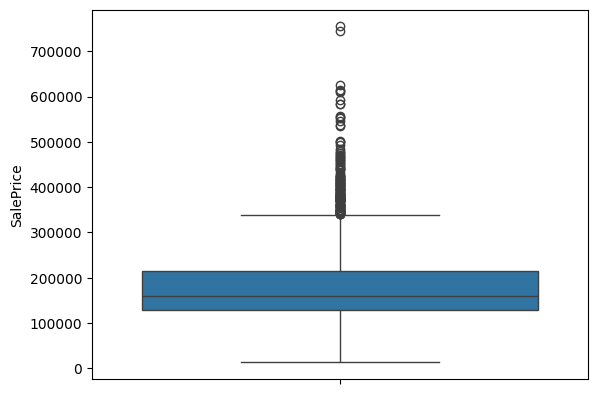

In [36]:
# Task 1 - Compute all dispersion measures for SalePrice
qa = df['SalePrice']
print("-------------------------")
print("Range =", qa.max() - qa.min())
print("Variance = ", qa.var().round(3))
print("SD = ", qa.std().round(3))
print("Mean Deviation = ", (qa-qa.mean()).abs().mean().round(3)) # Haven't spotted critical flaw. Absolute Mean of all deviations != mean of absolute values of deviations
print("IQR = ", qa.quantile(0.75)-qa.quantile(0.25))


# Task 2 - Plot boxplot for SalePrice
sns.boxplot(y=qa)

# Task 3 - compute skewness
print("Skewness =", qa.skew().round(3))

# Task 4 - Identify observation w/ Median SalePrice, Identify Outliner, Compare
target_mid = qa[len(qa)/2]
info_mid = df.loc[df['SalePrice'] == target_mid]
print("Info about median", info_mid)

target_out = qa[1]
info_out = df.loc[df['SalePrice'] == target_out]
print("Info about outliner", info_out)


# Problem 3. Compare groups. (Team 2 is responsible for this task.)

## Task 1. Compute summary statistics for SalePrice for diﬀerent groups.

In [7]:
# Let's do Summary statistics for each group
grouped = df.groupby('House Style')['SalePrice']
print("-------------------------")
print("House Style Group Summary Statistics:")
print(grouped.describe())

for group in grouped.groups:
    print(f"House Style: {group}")
    print(" Variance =", grouped.get_group(group).var().round(3))
    print(" Span is =", (grouped.get_group(group).max() - grouped.get_group(group).min()).round(3))
    print("Min and max values = ", grouped.get_group(group).min().round(3), grouped.get_group(group).max().round(3))
    print(" Standard Deviation =", grouped.get_group(group).std().round(3))
    print(" Skewness =", grouped.get_group(group).skew().round(3))
    print(" Kurtosis =", grouped.get_group(group).kurtosis().round(3))
    print("-------------------------")


-------------------------
House Style Group Summary Statistics:
              count           mean            std       min       25%  \
House Style                                                             
1.5Fin        314.0  137529.923567   47225.667545   37900.0  113000.0   
1.5Unf         19.0  109663.157895   20569.589488   64500.0   99850.0   
1Story       1481.0  178699.875084   81066.936614   12789.0  127000.0   
2.5Fin          8.0  220000.000000  118211.976671  104000.0  164250.0   
2.5Unf         24.0  177158.333333   76114.764132   97500.0  129125.0   
2Story        873.0  206990.159221   85349.912802   40000.0  154000.0   
SFoyer         83.0  143472.662651   31220.075418   70000.0  130000.0   
SLvl          128.0  165527.382812   34348.130088   91000.0  146950.0   

                  50%       75%       max  
House Style                                
1.5Fin       129675.0  149375.0  410000.0  
1.5Unf       113000.0  120000.0  139400.0  
1Story       155000.0  213750

## Task 2. Compute all dispersion measures.

In [8]:
# Group your data by "House style"
grouped = df.groupby('House Style')['SalePrice']

print("-------------------------")
print("Hose Style Grouped Dispersion Measures:")
print(grouped.var())

-------------------------
Hose Style Grouped Dispersion Measures:
House Style
1.5Fin    2.230264e+09
1.5Unf    4.231080e+08
1Story    6.571848e+09
2.5Fin    1.397407e+10
2.5Unf    5.793457e+09
2Story    7.284608e+09
SFoyer    9.746931e+08
SLvl      1.179794e+09
Name: SalePrice, dtype: float64


## Task 3. Plot the boxplots for SalePrice for diﬀerent groups.

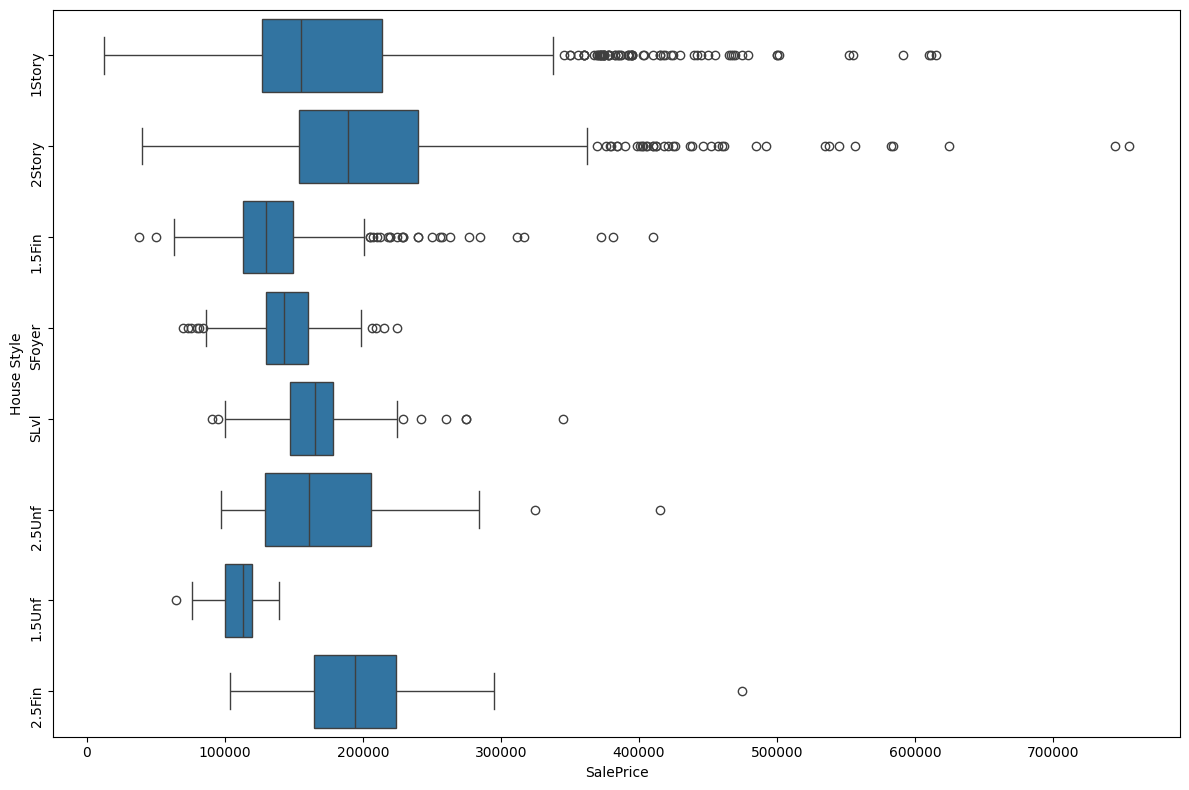

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='SalePrice', y='House Style')
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()


## Repeat for BldgType

In [10]:
# Group your data by "Building Type"
grouped = df.groupby('Bldg Type')['SalePrice']

print("-------------------------")
print("BldgType Grouped Dispersion Measures:")
print(grouped.var())

-------------------------
BldgType Grouped Dispersion Measures:
Bldg Type
1Fam      6.859451e+09
2fmCon    9.665408e+08
Duplex    1.560169e+09
Twnhs     1.758874e+09
TwnhsE    4.381346e+09
Name: SalePrice, dtype: float64


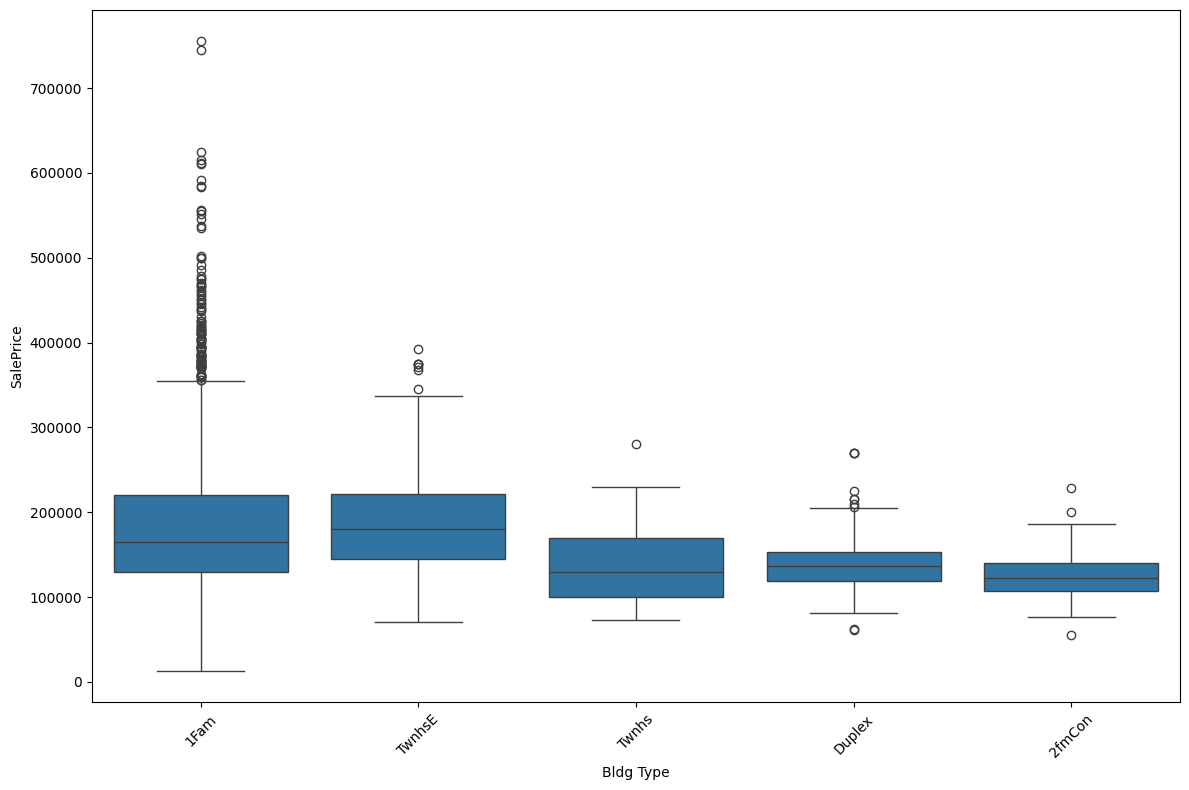

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Bldg Type', y='SalePrice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Problem 4. Paired Data Analysis

-------------------------
SalePrice vs Lot Area Correlations:
PCC = 0.267
SCC = 0.429
-------------------------
SalePrice vs Year Built Correlations:
PCC = 0.558
SCC = 0.681
-------------------------
SalePrice vs Total Bsmt SF Correlations:
PCC = 0.632
SCC = 0.606
-------------------------
SalePrice vs Gr Liv Area Correlations:
PCC = 0.707
SCC = 0.723
-------------------------
SalePrice vs Garage Area Correlations:
PCC = 0.64
SCC = 0.661
-------------------------
Contingency Table:
Sale Condition  Abnorml  AdjLand  Alloca  Family  Normal  Partial
House Category                                                   
cheap               133       12      12      28    1075       11
expensive            17        0       4       7     519      157
medium               40        0       8      11     819       77
-------------------------
Chi-square statistic: 336.621
P-value: 0.000
Contingency Coefficient: 0.321


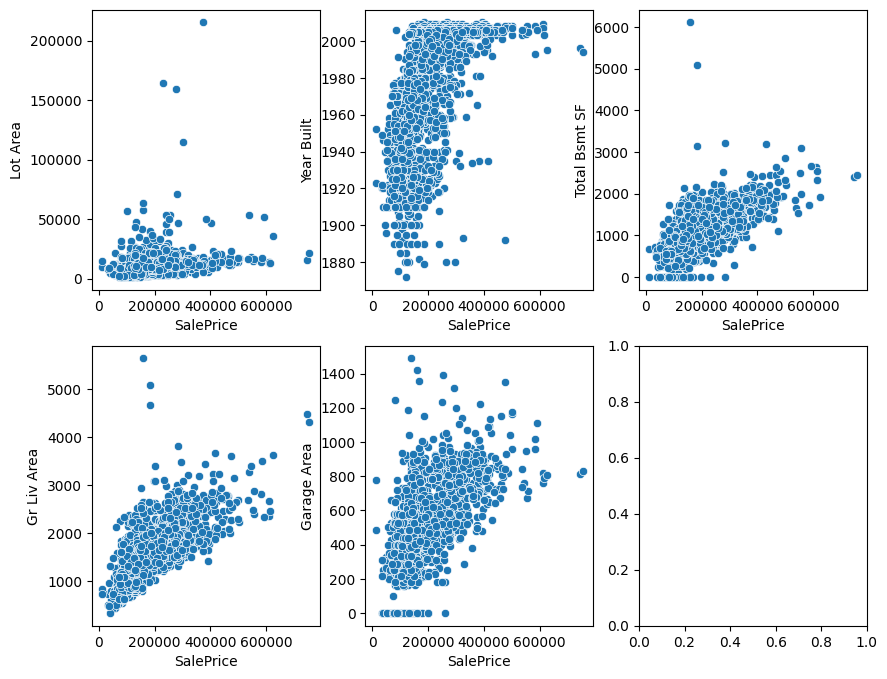

In [70]:
# Task a - plot the scatterplots

# Layout 
fig, axes = plt.subplots(2, 3, figsize=(10, 8))


sns.scatterplot(x=df['SalePrice'], y=df['Lot Area'], ax=axes[0, 0])
sns.scatterplot(x=df['SalePrice'], y=df['Year Built'], ax=axes[0, 1])
sns.scatterplot(x=df['SalePrice'], y=df['Total Bsmt SF'], ax=axes[0, 2])
sns.scatterplot(x=df['SalePrice'], y=df['Gr Liv Area'], ax=axes[1, 0])
sns.scatterplot(x=df['SalePrice'], y=df['Garage Area'], ax=axes[1, 1])

# Task b - compute Pearson and Spearman Correlation
# For SalePrice and Lot Area
print("-------------------------")
print("SalePrice vs Lot Area Correlations:")
print('PCC =', df['SalePrice'].corr(df['Lot Area'], method='pearson').round(3))
print('SCC =', df['SalePrice'].corr(df['Lot Area'], method='spearman').round(3))

# For SalePrice and Lot Area
print("-------------------------")
print("SalePrice vs Year Built Correlations:")
print('PCC =', df['SalePrice'].corr(df['Year Built'], method='pearson').round(3))
print('SCC =', df['SalePrice'].corr(df['Year Built'], method='spearman').round(3))

# For SalePrice and Lot Area
print("-------------------------")
print("SalePrice vs Total Bsmt SF Correlations:")
print('PCC =', df['SalePrice'].corr(df['Total Bsmt SF'], method='pearson').round(3))
print('SCC =', df['SalePrice'].corr(df['Total Bsmt SF'], method='spearman').round(3))

# For SalePrice and Lot Area
print("-------------------------")
print("SalePrice vs Gr Liv Area Correlations:")
print('PCC =', df['SalePrice'].corr(df['Gr Liv Area'], method='pearson').round(3))
print('SCC =', df['SalePrice'].corr(df['Gr Liv Area'], method='spearman').round(3))

# For SalePrice and Lot Area
print("-------------------------")
print("SalePrice vs Garage Area Correlations:")
print('PCC =', df['SalePrice'].corr(df['Garage Area'], method='pearson').round(3))
print('SCC =', df['SalePrice'].corr(df['Garage Area'], method='spearman').round(3))


# Task c - group data by saleprice and build contingency tables
def categorizeHouse(housePrice: int):
    if housePrice<=150_000:
        return 'cheap'
    if 150_000<housePrice<=215_000:
        return 'medium'
    if housePrice>215_000:
        return 'expensive'

df['House Category'] = df['SalePrice'].apply(categorizeHouse)

grouped = df.groupby('House Category')['SalePrice']

contingency_table = pd.crosstab(df['House Category'], df['Sale Condition'])
# Corrected Contingency Coefficient of Pearson based on Contingency Table

print("-------------------------")
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Contingency Coefficient
n = contingency_table.sum().sum()
C = (chi2 / (chi2 + n)) ** 0.5

print("-------------------------")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Contingency Coefficient: {C:.3f}")


# Problem 5. Feature Engineering

-------------------------
PricePerSqFt Description:
count    2930.000000
mean      121.303619
std        32.090488
min        15.371394
25%        99.871575
50%       120.230070
75%       139.885283
max       276.250881
Name: PricePerSqFt, dtype: float64
Variance = 1029.799
Standard Deviation = 32.09
Skewness = 0.375
Kurtosis = 0.761
-------------------------
Range = 260.8794866712745
Variance =  1029.799
SD =  32.09
Mean Deviation =  24.825
IQR =  40.014
Skewness = 0.375
-------------------------
PricePerSqFt vs Lot Area Correlations:
PCC = 0.088
SCC = 0.133


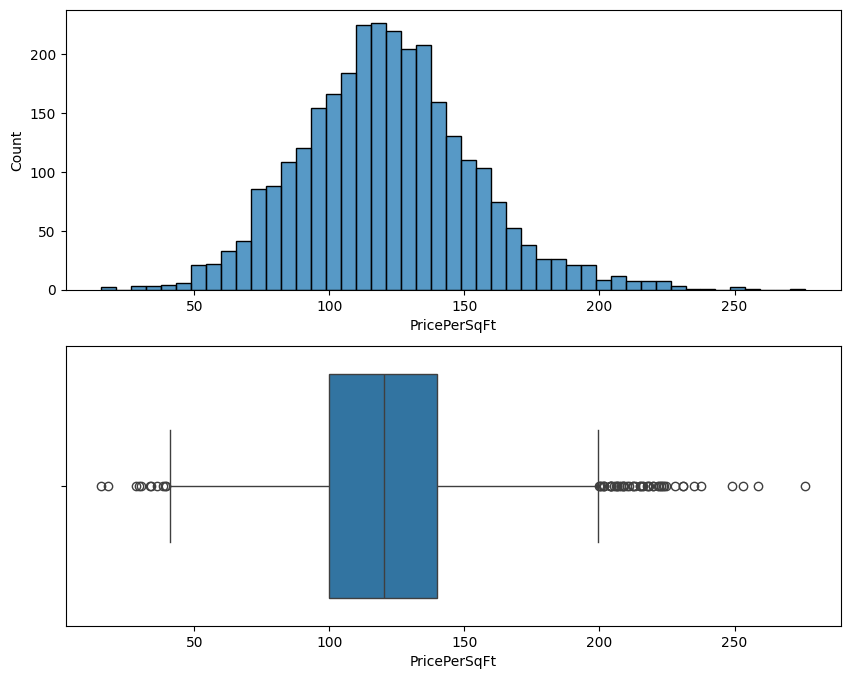

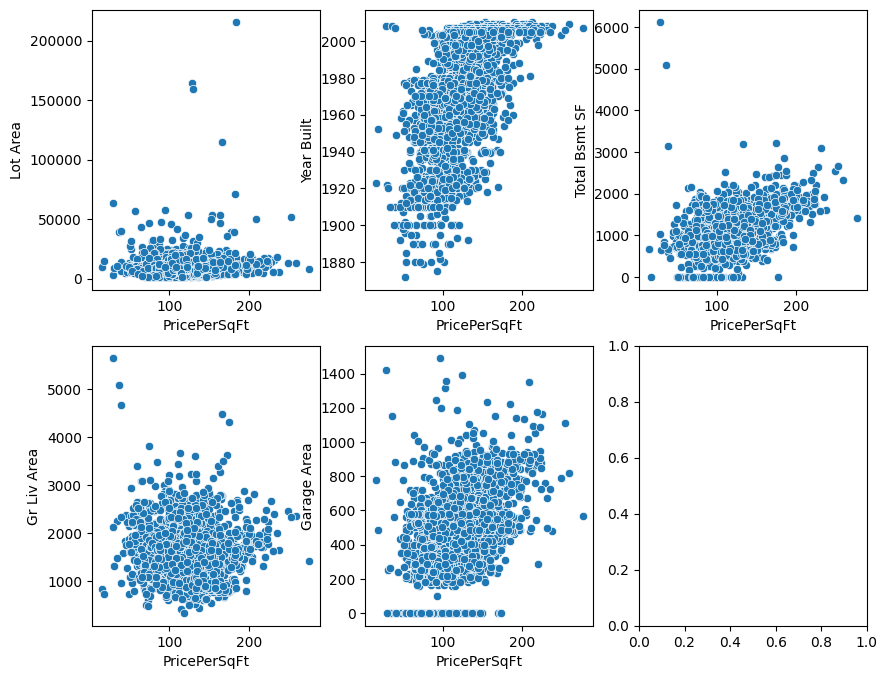

In [83]:
df['PricePerSqFt'] = df['SalePrice'] / df['Gr Liv Area']

# Layout
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Task 1. Plot the histogram of the new feature
sns.histplot(x=df['PricePerSqFt'], ax=axes[0])

# Task 2. Compute basic statistics for the new feature
print("-------------------------")
print("PricePerSqFt Description:")
print(df['PricePerSqFt'].describe())
print("Variance =", df['PricePerSqFt'].var().round(3))
print("Standard Deviation =", df['PricePerSqFt'].std().round(3))
print("Skewness =", df['PricePerSqFt'].skew().round(3))
print("Kurtosis =", df['PricePerSqFt'].kurtosis().round(3))

# Task 3. Compute Dispersion measures for the new feature
qp = df['PricePerSqFt']
print("-------------------------")
print("Range =", qp.max() - qp.min())
print("Variance = ", qp.var().round(3))
print("SD = ", qp.std().round(3))
print("Mean Deviation = ", (qp-qp.mean()).abs().mean().round(3))
print("IQR = ", (qp.quantile(0.75)-qp.quantile(0.25)).round(3))

# Task 4. BoxPlot 
sns.boxplot(x=qp, ax=axes[1])

# Task 5. Skewness
print("Skewness =", qp.skew().round(3))

# Task 6. Scatterplots for PricePPerSqFt and LotArea,YearBuilt, TotalBsmtSF, GrLivArea, GarageArea
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
sns.scatterplot(x=df['PricePerSqFt'], y=df['Lot Area'], ax=axes[0, 0])
sns.scatterplot(x=df['PricePerSqFt'], y=df['Year Built'], ax=axes[0, 1])
sns.scatterplot(x=df['PricePerSqFt'], y=df['Total Bsmt SF'], ax=axes[0, 2])
sns.scatterplot(x=df['PricePerSqFt'], y=df['Gr Liv Area'], ax=axes[1, 0])
sns.scatterplot(x=df['PricePerSqFt'], y=df['Garage Area'], ax=axes[1, 1])

# Task 7. Pearson and Spearman Correlation
print("-------------------------")
print("PricePerSqFt vs Lot Area Correlations:")
print('PCC =', df['PricePerSqFt'].corr(df['Lot Area'], method='pearson').round(3))
print('SCC =', df['PricePerSqFt'].corr(df['Lot Area'], method='spearman').round(3))